# Mutlinomial Logistic Regression

In [1]:
using DataFrames, CSV, Plots, GLM, StatsBase, Lathe, MLBase, ClassImbalance, ROCAnalysis, PyCall
ENV["COLUMNS"] = 1000


(process:6456): GLib-GIO-WARNING **: 10:16:20.267: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.21111.10511.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


1000

### Test

In [2]:
df = DataFrame(CSV.File("Churn_Modelling.csv"))

1

In [3]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,RowNumber,5000.5,1,5000.5,10000,,,Int64
2,CustomerId,1.56909e7,15565701,1.56907e7,15815690,,,Int64
3,Surname,,Abazu,,Zuyeva,2932,,String31
4,CreditScore,650.529,350,652.0,850,,,Int64
5,Geography,,France,,Spain,3,,String7
6,Gender,,Female,,Male,2,,String7
7,Age,38.9218,18,37.0,92,,,Int64
8,Tenure,5.0128,0,5.0,10,,,Int64
9,Balance,76485.9,0.0,97198.5,2.50898e5,,,Float64


In [4]:
countmap(df.Exited)

Dict{Int64, Int64} with 2 entries:
  0 => 7963
  1 => 2037

In [5]:
Lathe.preprocess.OneHotEncode(df, :Geography)
Lathe.preprocess.OneHotEncode(df, :Gender)

first(select!(df, Not([:RowNumber, :CustomerId, :Geography, :Gender, :Male])), 10)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany,Female
,String31,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64,Bool,Bool,Bool,Bool
1,Hargrave,619,42,2,0.0,1,1,1,1.01349e5,1,1,0,0,1
2,Hill,608,41,1,83807.9,1,0,1,1.12543e5,0,0,1,0,1
3,Onio,502,42,8,1.59661e5,3,1,0,1.13932e5,1,1,0,0,1
4,Boni,699,39,1,0.0,2,0,0,93826.6,0,1,0,0,1
5,Mitchell,850,43,2,1.25511e5,1,1,1,79084.1,0,0,1,0,1
6,Chu,645,44,8,1.13756e5,2,1,0,1.49757e5,1,0,1,0,0
7,Bartlett,822,50,7,0.0,2,1,1,10062.8,0,1,0,0,0
8,Obinna,376,29,4,1.15047e5,4,1,0,1.19347e5,1,0,0,1,1
9,He,501,44,4,1.42051e5,2,0,1,74940.5,0,1,0,0,0


In [6]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .75)

1

In [12]:
fm = @formula(Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Exited ~ 1 + CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      -1.94892      0.167971     -11.60    <1e-30  -2.27814      -1.61971
CreditScore      -0.000360904  0.000183487   -1.97    0.0492  -0.000720531  -1.27692e-6
Age               0.0421774    0.00168355    25.05    <1e-99   0.0388777     0.0454771
Tenure           -0.00582327   0.0061443     -0.95    0.3433  -0.0178659     0.00621933
Balance           1.

In [8]:
prediction = predict(logit, test)

2446-element Vector{Union{Missing, Float64}}:
 0.1713473883125452
 0.09787284146321856
 0.02897679444344508
 0.11629525343670225
 0.026023972824911718
 0.054773241905952515
 0.15108774551781856
 0.2520169810675838
 0.08884743705839493
 0.19491666501976748
 ⋮
 0.3642184021742281
 0.24392619523724335
 0.13365613572027468
 0.20684038016991094
 0.1525464419791192
 0.06321964769606489
 0.09963653443439871
 0.048034476374599365
 0.07671116389326385

In [9]:
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]

prediction_df = DataFrame(y_actual = test.Exited, y_predicted = prediction_class, prob_predicted = prediction)
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

1

In [10]:
accuracy = mean(prediction_df.correctly_classified)

0.8115290269828291

#### Another take on the model

In [58]:
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

# By looking at the confusion matrix you must have got to know about the problem in
# the current model. If not, no worries, I will explain it. The model is predicting 
# class 0, most of the time. It has failed to predict the class 1. The count of false 
# positive is around 4+ times than the true positive. Which proves that the model has
# failed miserably to predict the class 1. Let’s look at another very important metric 
# to check the performance of model

ROCNums{Int64}
  p = 491
  n = 1983
  tp = 94
  tn = 1904
  fp = 79
  fn = 397


In [75]:
using PyCall
sklearn = pyimport("sklearn.metrics")

PyObject <module 'sklearn.metrics' from 'C:\\Users\\pwisl\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [76]:
# Compute false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = sklearn.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\pwisl\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


([0.0, 0.0, 0.0, 0.0005042864346949068, 0.0005042864346949068, 0.0010085728693898135, 0.0010085728693898135, 0.0015128593040847202, 0.0015128593040847202, 0.002017145738779627  …  0.9112455874936964, 0.9112455874936964, 0.9157841654059505, 0.9157841654059505, 0.9409984871406959, 0.9409984871406959, 0.989409984871407, 0.989409984871407, 1.0, 1.0], [0.0, 0.002036659877800407, 0.004073319755600814, 0.004073319755600814, 0.006109979633401222, 0.006109979633401222, 0.012219959266802444, 0.012219959266802444, 0.016293279022403257, 0.016293279022403257  …  0.9898167006109979, 0.9918533604887984, 0.9918533604887984, 0.9938900203665988, 0.9938900203665988, 0.9959266802443992, 0.9959266802443992, 0.9979633401221996, 0.9979633401221996, 1.0], [1.881989644508902, 0.8819896445089019, 0.8652406546142077, 0.8390504369246465, 0.8313370531832935, 0.8288397412303714, 0.81029349708397, 0.8036076375917024, 0.7853113656038431, 0.7849164885152478  …  0.03427259146505448, 0.03424032195415132, 0.0331047377036

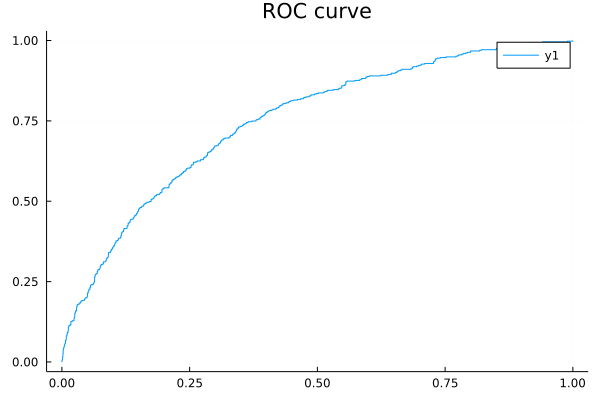

In [79]:
# Plot ROC curve
plot(fpr, tpr, grid = 0)
title!("ROC curve")


- There's additional information about how to smoothe the model; it's available from: https://www.machinelearningplus.com/julia/logistic-regression-in-julia-practical-guide-with-examples/

### Actual

In [13]:
df = DataFrame(CSV.File("bank.csv"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,Int64,String15,String15,String15,String3,Int64,String3,String3,String15,Int64,String3,Int64,Int64,Int64,Int64,String7,String3
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [14]:
select!(df, Not([:y, :poutcome, :previous, :pdays, :campaign, :duration, :month, :day, :contact]))

,age,job,marital,education,default,balance,housing,loan
,Int64,String15,String15,String15,String3,Int64,String3,String3
1,30,unemployed,married,primary,no,1787,no,no
2,33,services,married,secondary,no,4789,yes,yes
3,35,management,single,tertiary,no,1350,yes,no
4,30,management,married,tertiary,no,1476,yes,yes
5,59,blue-collar,married,secondary,no,0,yes,no
6,35,management,single,tertiary,no,747,no,no
7,36,self-employed,married,tertiary,no,307,yes,no
8,39,technician,married,secondary,no,147,yes,no
9,41,entrepreneur,married,tertiary,no,221,yes,no


In [179]:
print(to_tex(summarize(df)))

\begin{tabular}{r|ccccc}
\toprule
             & Obs  & Mean     & Std. Dev. & Min   & Max   \\ \hline
         age & 4483 &   41.111 &    10.559 &    19 &    87 \\
     balance & 4483 & 1421.988 &  3017.124 & -3313 & 71188 \\
     housing & 4483 &    0.571 &     0.495 &     0 &     1 \\
     defualt & 4483 &    0.017 &     0.129 &     0 &     1 \\
        loan & 4483 &    0.154 &     0.361 &     0 &     1 \\
  unemployed & 4483 &    0.029 &     0.167 & false &  true \\
    services & 4483 &    0.093 &     0.290 & false &  true \\
  management & 4483 &    0.216 &     0.412 & false &  true \\
  bluecollar & 4483 &    0.211 &     0.408 & false &  true \\
selfemployed & 4483 &    0.041 &     0.198 & false &  true \\
  technician & 4483 &    0.171 &     0.377 & false &  true \\
entrepreneur & 4483 &    0.037 &     0.190 & false &  true \\
       admin & 4483 &    0.107 &     0.309 & false &  true \\
     student & 4483 &    0.019 &     0.136 & false &  true \\
   housemaid & 4483 &    0.02

In [15]:
# Loan is the dependent variable
countmap(df.loan)

Dict{String3, Int64} with 2 entries:
  "yes" => 691
  "no"  => 3830

In [17]:
#transform string into an int
housing_ = [if x == "no" 0 else 1 end for x in df.housing]
loan_ = [if x == "no" 0 else 1 end for x in df.loan]
default = [if x == "no" 0 else 1 end for x in df.default]

deletecols!(df, [:default, :housing, :loan])

df[:housing] = housing_
df[:defualt] = default
df[:loan] = loan_

,age,job,marital,education,balance
,Int64,String15,String15,String15,Int64
1,30,unemployed,married,primary,1787
2,33,services,married,secondary,4789
3,35,management,single,tertiary,1350
4,30,management,married,tertiary,1476
5,59,blue-collar,married,secondary,0
6,35,management,single,tertiary,747
7,36,self-employed,married,tertiary,307
8,39,technician,married,secondary,147
9,41,entrepreneur,married,tertiary,221


In [20]:
df = df[(df.job .!= "unknown") .&& (df.marital .!= "unknown") .&& (df.job .!= "unknown"), :]

,age,job,marital,education,balance,housing,defualt,loan
,Int64,String15,String15,String15,Int64,Int64,Int64,Int64
1,30,unemployed,married,primary,1787,0,0,0
2,33,services,married,secondary,4789,1,0,1
3,35,management,single,tertiary,1350,1,0,0
4,30,management,married,tertiary,1476,1,0,1
5,59,blue-collar,married,secondary,0,1,0,0
6,35,management,single,tertiary,747,0,0,0
7,36,self-employed,married,tertiary,307,1,0,0
8,39,technician,married,secondary,147,1,0,0
9,41,entrepreneur,married,tertiary,221,1,0,0


In [21]:
Lathe.preprocess.OneHotEncode(df, :job)
Lathe.preprocess.OneHotEncode(df, :marital)
Lathe.preprocess.OneHotEncode(df, :education)

select!(df, Not([:job, :education, :marital]))

,age,balance,housing,defualt,loan,unemployed,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired,married,single,divorced,primary,secondary,tertiary,unknown
,Int64,Int64,Int64,Int64,Int64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,30,1787,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,33,4789,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,1350,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,30,1476,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,59,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,35,747,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,36,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
8,39,147,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,41,221,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [22]:
println(names(df))

[:age, :balance, :housing, :defualt, :loan, :unemployed, :services, :management, Symbol("blue-collar"), Symbol("self-employed"), :technician, :entrepreneur, Symbol("admin."), :student, :housemaid, :retired, :married, :single, :divorced, :primary, :secondary, :tertiary, :unknown]


In [23]:
rename!(df, Symbol("admin.") => :admin)
rename!(df, Symbol("blue-collar") => :bluecollar)
rename!(df, Symbol("self-employed") => :selfemployed)


,age,balance,housing,defualt,loan,unemployed,services,management,bluecollar,selfemployed,technician,entrepreneur,admin,student,housemaid,retired,married,single,divorced,primary,secondary,tertiary,unknown
,Int64,Int64,Int64,Int64,Int64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,30,1787,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,33,4789,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,1350,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,30,1476,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,59,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,35,747,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,36,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
8,39,147,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,41,221,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [24]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .8)

(3613×23 typename(DataFrame)
│ Row  │ age   │ balance │ housing │ defualt │ loan  │ unemployed │ services │ management │ bluecollar │ selfemployed │ technician │ entrepreneur │ admin │ student │ housemaid │ retired │ married │ single │ divorced │ primary │ secondary │ tertiary │ unknown │
│      │ Int64 │ Int64   │ Int64   │ Int64   │ Int64 │ Bool       │ Bool     │ Bool       │ Bool       │ Bool         │ Bool       │ Bool         │ Bool  │ Bool    │ Bool      │ Bool    │ Bool    │ Bool   │ Bool     │ Bool    │ Bool      │ Bool     │ Bool    │
├──────┼───────┼─────────┼─────────┼─────────┼───────┼────────────┼──────────┼────────────┼────────────┼──────────────┼────────────┼──────────────┼───────┼─────────┼───────────┼─────────┼─────────┼────────┼──────────┼─────────┼───────────┼──────────┼─────────┤
│ 1    │ 30    │ 1787    │ 0       │ 0       │ 0     │ 1          │ 0        │ 0          │ 0          │ 0            │ 0          │ 0            │ 0     │ 0       │ 0         │ 0       │ 

In [27]:
println(names(df))

[:age, :balance, :housing, :defualt, :loan, :unemployed, :services, :management, :bluecollar, :selfemployed, :technician, :entrepreneur, :admin, :student, :housemaid, :retired, :married, :single, :divorced, :primary, :secondary, :tertiary, :unknown]


In [58]:
fm = @formula(loan ~ age + balance + housing + defualt + unemployed + services + management + bluecollar + selfemployed + technician + entrepreneur + admin + student + housemaid + married + single + primary + secondary + tertiary)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

loan ~ 1 + age + balance + housing + defualt + unemployed + services + management + bluecollar + selfemployed + technician + entrepreneur + admin + student + housemaid + married + single + primary + secondary + tertiary

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   -1.40434     0.310299    -4.53    <1e-05  -2.01252     -0.796164
age           -0.00368372  0.00315853  -1.17    0.2435  -0.00987433   0.00250689
balance       -4.98057e-5  1.23327e-5  -4.04    <1e-04  -7.39772e-5  -2.56341e-5
housing       -0.0116734   0.0551141   -0.21    0.8323  -0.119695  

In [30]:
prediction = predict(logit, test)
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]

prediction_df = DataFrame(y_actual = test.loan, y_predicted = prediction_class, prob_predicted = prediction)
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

870-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 0
 1
 1
 1
 0

#### Model Assessment

In [33]:
accuracy = mean(prediction_df.correctly_classified)

0.8471264367816091

In [180]:
accuracy = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

ROCNums{Int64}
  p = 133
  n = 737
  tp = 0
  tn = 737
  fp = 0
  fn = 133


In [75]:
using PyCall
sklearn = pyimport("sklearn.metrics")
fpr, tpr, thresholds = sklearn.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)

# Plot ROC curve
plot(fpr, tpr, grid = 0, legend = false, linewidth = 3)
title!("ROC curve")
savefig("Plots\\ROC_Curve.png")


In [42]:
using TexTables

┌ Warning: Module DataFrames with build ID 1466479887845101 is missing from the cache.
│ This may mean DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107


In [69]:
println(logit)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

loan ~ 1 + age + balance + housing + defualt + unemployed + services + management + bluecollar + selfemployed + technician + entrepreneur + admin + student + housemaid + married + single + primary + secondary + tertiary

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   -1.40434     0.310299    -4.53    <1e-05  -2.01252     -0.796164
age           -0.00368372  0.00315853  -1.17    0.2435  -0.00987433   0.00250689
balance       -4.98057e-5  1.23327e-5  -4.04    <1e-04  -7.39772e-5  -2.56341e-5
housing       -0.0116734   0.0551141   -0.21    0.8323  -0.119695  

#### Plots

In [95]:
df_copy = DataFrame(CSV.File("bank.csv"))
select!(df_copy, Not([:day, :month, :duration, :campaign, :pdays, :previous, :poutcome, :y, :contact]))

,age,job,marital,education,default,balance,housing,loan
,Int64,String15,String15,String15,String3,Int64,String3,String3
1,30,unemployed,married,primary,no,1787,no,no
2,33,services,married,secondary,no,4789,yes,yes
3,35,management,single,tertiary,no,1350,yes,no
4,30,management,married,tertiary,no,1476,yes,yes
5,59,blue-collar,married,secondary,no,0,yes,no
6,35,management,single,tertiary,no,747,no,no
7,36,self-employed,married,tertiary,no,307,yes,no
8,39,technician,married,secondary,no,147,yes,no
9,41,entrepreneur,married,tertiary,no,221,yes,no


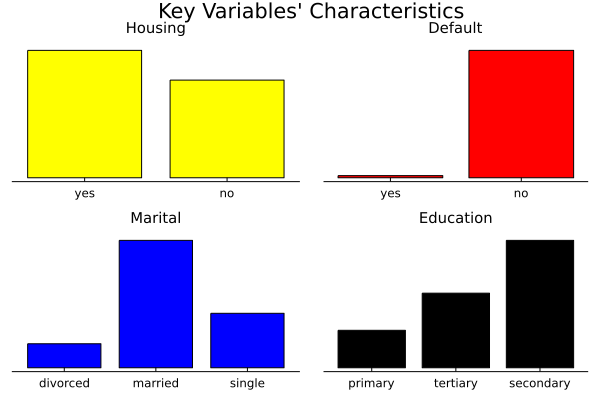

In [154]:
plot_housing = bar(countmap(df_copy.housing), grid = false, title = "Housing", color = :yellow, legend = false)
plot_default = bar(countmap(df_copy.default), grid = false, title = "Default", color = :red, legend = false)
plot_marital = bar(countmap(df_copy.marital), grid = false, title = "Marital", color = :blue, legend = false)
plot_education = bar(countmap(filter(row -> row != "unknown", df_copy.education)), grid = false, title = "Education", color = :black, legend = false)
# plot_job = bar(countmap(df_copy.job), grid = false, title = "Job", color = :blue, legend = false)

plot(plot_housing, plot_default, plot_marital, plot_education, layout = 4, figsize = (10,10), yticks = false, yaxis = false, plot_title = "Key Variables' Characteristics", titlefontsize = 10, plot_titlefontsize = 14)
# savefig("Plots\\KeyVar.png")

In [178]:
bar(countmap(df_copy.age), title = "Age Distribution", grid = false, legend = false, color = :black, ylabel = "Count")
savefig("Plots\\Age_Histogram.png")